## Work
1. 試比較 save_best_only 與否的差異
2. 請僅存入將 save_weights_only 設定為 True, 並嘗試 reset ipynb 並將模型與權重重新建回並預測 x_test

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
from keras.layers import BatchNormalization
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
"""Code Here
設定超參數
"""

LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [9]:
# 載入 Callbacks
"""Code Here
設定 callbacks: model checkpoint
"""

TF = [True,False]

from keras.callbacks import ModelCheckpoint

model_ckpt = ModelCheckpoint(filepath="./tmp.h5", 
                             monitor="val_loss", 
                             save_best_only=True,
                             save_weights_only=True)

results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for tf_b in TF:
    for tf_w in TF:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        model_ckpt = ModelCheckpoint(filepath="./tmp.h5", 
                                     monitor="val_loss", 
                                     save_best_only=tf_b,
                                     save_weights_only=tf_w)
        print("save_best_only: ", tf_b, ", Experiment with save_weights_only: ", tf_w)
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True,
                  callbacks=[model_ckpt]
                  )
    
        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]
    
        exp_name_tag = "save_best: %s ; save_weights: %s" % (str(tf_b),str(tf_w))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

save_best_only:  True , Experiment with save_weights_only:  True
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_norma

50000/50000 [==============================] - 8s 154us/step - loss: 0.5126 - acc: 0.8564 - val_loss: 1.6535 - val_acc: 0.4912
Epoch 50/50
50000/50000 [==============================] - 8s 155us/step - loss: 0.4959 - acc: 0.8612 - val_loss: 1.6928 - val_acc: 0.4836
save_best_only:  True , Experiment with save_weights_only:  False
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_no

50000/50000 [==============================] - 8s 155us/step - loss: 0.5693 - acc: 0.8303 - val_loss: 1.6233 - val_acc: 0.4858
Epoch 48/50
50000/50000 [==============================] - 8s 154us/step - loss: 0.5514 - acc: 0.8392 - val_loss: 1.6468 - val_acc: 0.4917
Epoch 49/50
50000/50000 [==============================] - 8s 166us/step - loss: 0.5327 - acc: 0.8466 - val_loss: 1.6464 - val_acc: 0.4892
Epoch 50/50
50000/50000 [==============================] - 8s 154us/step - loss: 0.5187 - acc: 0.8512 - val_loss: 1.6811 - val_acc: 0.4899
save_best_only:  False , Experiment with save_weights_only:  True
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
____________________________________________________________

50000/50000 [==============================] - 8s 169us/step - loss: 0.5731 - acc: 0.8306 - val_loss: 1.6002 - val_acc: 0.4971
Epoch 46/50
50000/50000 [==============================] - 9s 181us/step - loss: 0.5570 - acc: 0.8365 - val_loss: 1.6296 - val_acc: 0.4956
Epoch 47/50
50000/50000 [==============================] - 8s 164us/step - loss: 0.5374 - acc: 0.8453 - val_loss: 1.6425 - val_acc: 0.4848
Epoch 48/50
50000/50000 [==============================] - 8s 166us/step - loss: 0.5212 - acc: 0.8517 - val_loss: 1.6504 - val_acc: 0.4916
Epoch 49/50
50000/50000 [==============================] - 8s 160us/step - loss: 0.5054 - acc: 0.8572 - val_loss: 1.6761 - val_acc: 0.4889
Epoch 50/50
50000/50000 [==============================] - 8s 163us/step - loss: 0.4896 - acc: 0.8636 - val_loss: 1.6661 - val_acc: 0.4876
save_best_only:  False , Experiment with save_weights_only:  False
_________________________________________________________________
Layer (type)                 Output Shape    

50000/50000 [==============================] - 8s 152us/step - loss: 0.6164 - acc: 0.8129 - val_loss: 1.5774 - val_acc: 0.4916
Epoch 44/50
50000/50000 [==============================] - 8s 152us/step - loss: 0.5996 - acc: 0.8198 - val_loss: 1.5842 - val_acc: 0.4942
Epoch 45/50
50000/50000 [==============================] - 8s 152us/step - loss: 0.5810 - acc: 0.8279 - val_loss: 1.6132 - val_acc: 0.4883
Epoch 46/50
50000/50000 [==============================] - 8s 168us/step - loss: 0.5631 - acc: 0.8342 - val_loss: 1.6411 - val_acc: 0.4897
Epoch 47/50
50000/50000 [==============================] - 8s 156us/step - loss: 0.5449 - acc: 0.8418 - val_loss: 1.6295 - val_acc: 0.4962
Epoch 48/50
50000/50000 [==============================] - 8s 154us/step - loss: 0.5275 - acc: 0.8483 - val_loss: 1.6544 - val_acc: 0.4867
Epoch 49/50
50000/50000 [==============================] - 8s 152us/step - loss: 0.5142 - acc: 0.8521 - val_loss: 1.6422 - val_acc: 0.4908
Epoch 50/50
50000/50000 [==============

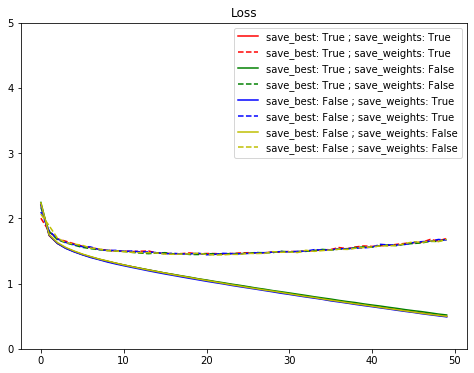

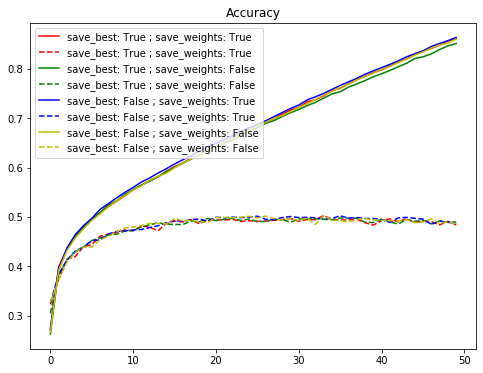

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""


color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()